In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv("/shared/3/projects/benlitterer/podcastData/podRss/floydFeeds/floydMetadata.csv")

<ipython-input-2-3f7810a8e0d9>:1: DtypeWarning: Columns (5,6,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/shared/3/projects/benlitterer/podcastData/podRss/floydFeeds/floydMetadata.csv")


In [8]:
cols = ["url", "epTitle", "epDescription", "duration", "pubDate", "copyright", "type",\
       "complete", "guid", "explicit", "mp3Url", "image", "transDict"]

In [9]:
df.columns = cols

In [14]:
df.shape

(26934615, 13)

In [12]:
cleanDf = df.dropna(subset=["epTitle"])

In [13]:
cleanDf.shape

(26791048, 13)

In [15]:
#what fraction did we miss? 
#load in the names we were looking for 
floydNames = pd.read_csv("/shared/3/projects/benlitterer/podcastData/podcastIndex/floydSubset.csv")

<ipython-input-15-36ac5e2afaff>:3: DtypeWarning: Columns (1,8,9,14,24,25,38) have mixed types. Specify dtype option on import or set low_memory=False.
  floydNames = pd.read_csv("/shared/3/projects/benlitterer/podcastData/podcastIndex/floydSubset.csv")


In [18]:
floydUrls = set(floydNames["url"])

In [19]:
gotUrls = set(df["url"])

In [25]:
missingUrls = set(list(floydUrls - gotUrls))

In [26]:
len(missingUrls)

1085267

In [27]:
len(floydUrls)

2115280

In [30]:
#get a dataframe of the missing urls
floydNames["retreived"] = floydNames["url"].apply(lambda x: x in missingUrls)

In [47]:
missingRows = floydNames[floydNames["retreived"]]

In [48]:
missingRows.head()

,Unnamed: 0.1,Unnamed: 0,id,url,title,lastUpdate,link,lastHttpStatus,dead,contentType,...,category4,category5,category6,category7,category8,category9,category10,newestEnclosureDuration,oldestItemDatetime,retreived
0,0,0,1,https://markalanwilliams.libsyn.com/rss,Christianity Questions and Answers,1.697645e+09,http://markalanwilliams.libsyn.com/webpage,200.0,0,application/rss+xml; charset=utf-8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,384.0,2015-05-28 18:25:32,True
1,1,1,2,https://anchor.fm/s/19ccb320/podcast/rss,Rahdo Talks Through,1.697797e+09,https://patreon.com/rahdo,200.0,0,application/rss+xml; charset=utf-8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4022.0,2015-05-31 03:00:00,True
2,2,2,4,https://feeds.soundcloud.com/users/soundcloud:...,IdiotSpeakShow,1.697837e+09,https://soundcloud.com/idiotspeakshow,200.0,0,application/rss+xml; charset=utf-8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2722.0,2015-05-22 23:33:24,True
3,3,3,5,https://audioboom.com/channels/4597972.rss,Conciertos en el Living,1.684350e+09,http://conciertosenelliving.com/podcast/,200.0,0,application/rss+xml; charset=utf-8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,738.0,2015-04-08 22:26:52,True
5,5,5,7,http://feeds.feedburner.com/DirtBikePodcast,2017 U.S. Dirt Bike Events,1.697743e+09,http://www.usdualsports.com/feeds/posts/default,200.0,0,text/xml; charset=UTF-8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00,True


In [40]:
missingRows.loc[5, "link"] 

'http://www.usdualsports.com/feeds/posts/default'

In [41]:
missingRows.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'url', 'title', 'lastUpdate',
       'link', 'lastHttpStatus', 'dead', 'contentType', 'itunesId',
       'originalUrl', 'itunesAuthor', 'itunesOwnerName', 'explicit',
       'imageUrl', 'itunesType', 'generator', 'newestItemPubdate', 'language',
       'oldestItemPubdate', 'episodeCount', 'popularityScore', 'priority',
       'createdOn', 'updateFrequency', 'chash', 'host', 'newestEnclosureUrl',
       'podcastGuid', 'description', 'category1', 'category2', 'category3',
       'category4', 'category5', 'category6', 'category7', 'category8',
       'category9', 'category10', 'newestEnclosureDuration',
       'oldestItemDatetime', 'retreived'],
      dtype='object')

In [49]:
missingRows["lastUpdate"] = pd.to_datetime(missingRows["lastUpdate"], unit="s")

<ipython-input-49-4641db687a6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missingRows["lastUpdate"] = pd.to_datetime(missingRows["lastUpdate"], unit="s")


<Axes: xlabel='lastUpdate', ylabel='Count'>

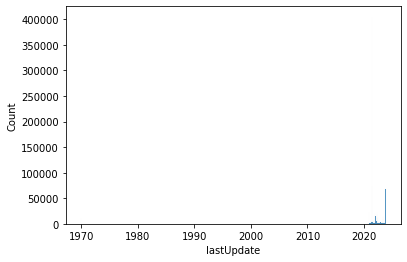

In [50]:
sns.histplot(data=missingRows, x="lastUpdate")

In [53]:
missingRows["originalUrl"]

0                    https://markalanwilliams.libsyn.com/rss
1                   https://anchor.fm/s/19ccb320/podcast/rss
2          http://feeds.soundcloud.com/users/soundcloud:u...
3                 https://audioboom.com/channels/4597972.rss
5                http://feeds.feedburner.com/DirtBikePodcast
                                 ...                        
2099833    https://feeds.soundcloud.com/users/soundcloud:...
2099842    https://feeds.soundcloud.com/users/soundcloud:...
2099858    https://feeds.soundcloud.com/users/soundcloud:...
2099873    https://elmad.pardes.org/topic/tanakh/torah/de...
2099874    https://feeds.soundcloud.com/playlists/soundcl...
Name: originalUrl, Length: 1085267, dtype: object

In [56]:
#ok so roughly a quarter aren't rss feeds 
missingRows["isRss"] = missingRows["url"].apply(lambda x: "rss" in x)
missingRows[missingRows["isRss"]]

<ipython-input-56-e34afafbf5d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missingRows["isRss"] = missingRows["url"].apply(lambda x: "rss" in x)


,Unnamed: 0.1,Unnamed: 0,id,url,title,lastUpdate,link,lastHttpStatus,dead,contentType,...,category5,category6,category7,category8,category9,category10,newestEnclosureDuration,oldestItemDatetime,retreived,isRss
0,0,0,1,https://markalanwilliams.libsyn.com/rss,Christianity Questions and Answers,2023-10-18 16:05:34,http://markalanwilliams.libsyn.com/webpage,200.0,0,application/rss+xml; charset=utf-8,...,NaN,NaN,NaN,NaN,NaN,NaN,384.0,2015-05-28 18:25:32,True,True
1,1,1,2,https://anchor.fm/s/19ccb320/podcast/rss,Rahdo Talks Through,2023-10-20 10:11:31,https://patreon.com/rahdo,200.0,0,application/rss+xml; charset=utf-8,...,NaN,NaN,NaN,NaN,NaN,NaN,4022.0,2015-05-31 03:00:00,True,True
2,2,2,4,https://feeds.soundcloud.com/users/soundcloud:...,IdiotSpeakShow,2023-10-20 21:17:24,https://soundcloud.com/idiotspeakshow,200.0,0,application/rss+xml; charset=utf-8,...,NaN,NaN,NaN,NaN,NaN,NaN,2722.0,2015-05-22 23:33:24,True,True
3,3,3,5,https://audioboom.com/channels/4597972.rss,Conciertos en el Living,2023-05-17 18:54:14,http://conciertosenelliving.com/podcast/,200.0,0,application/rss+xml; charset=utf-8,...,NaN,NaN,NaN,NaN,NaN,NaN,738.0,2015-04-08 22:26:52,True,True
6,6,6,8,https://anchor.fm/s/28f184c/podcast/rss,RNG Show,2023-10-13 10:43:18,https://podcasters.spotify.com/pod/show/rngshow,200.0,0,application/rss+xml; charset=utf-8,...,NaN,NaN,NaN,NaN,NaN,NaN,3777.0,2018-01-28 00:00:00,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099821,4167944,4165280,6564420,https://feeds.soundcloud.com/users/soundcloud:...,Steve_Bell,2023-08-07 13:06:27,http://stevebell.com,200.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,185.0,1992-11-15 00:00:00,True,True
2099833,4168029,4165365,6564529,https://feeds.soundcloud.com/users/soundcloud:...,Hyeryeong Jang,2023-08-07 14:45:18,http://420books.tistory.com,200.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,628.0,2016-05-01 06:36:39,True,True
2099842,4168114,4165450,6564632,https://feeds.soundcloud.com/users/soundcloud:...,#PLAYMRVL Playlists,2023-08-30 12:25:42,http://unitedmasters.com/simz-mrvl,200.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,187.0,2020-04-02 19:27:34,True,True
2099858,4168230,4165566,6564783,https://feeds.soundcloud.com/users/soundcloud:...,Storytelling broadcast,2023-08-07 18:39:41,https://soundcloud.com/orlandofriasg,200.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3885.0,2015-03-19 06:31:25,True,True


In [63]:
missingRows["episodeCount"]

0           90.0
1          411.0
2            2.0
3           19.0
5            1.0
           ...  
2099833      5.0
2099842      6.0
2099858      2.0
2099873      6.0
2099874      3.0
Name: episodeCount, Length: 1085267, dtype: float64